# Life Expectancy Prediction

## Importing required Libraries

In [1]:
# Basic ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Creation Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creating Neural Networks and Perceptrons
from tensorflow import keras
from tensorflow.keras import layers

## Loading Data, Exploratory Data Analysis and Feature Engineering

In [2]:
df = pd.read_csv('Data/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<AxesSubplot:>

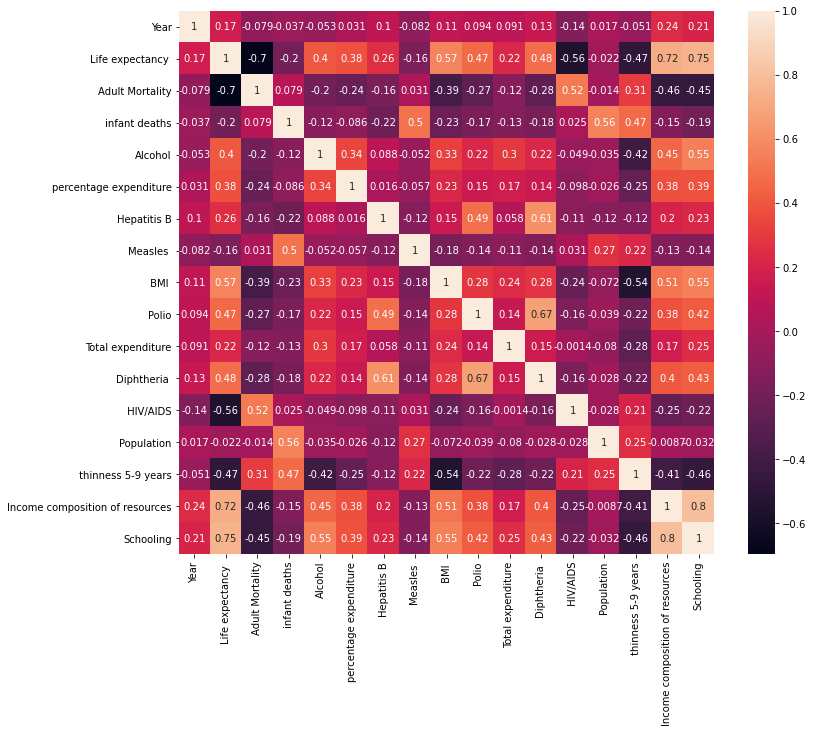

In [4]:
plt.figure(figsize=(12,10))
df = df.drop(columns=['under-five deaths ', 'GDP', ' thinness  1-19 years'])
sns.heatmap(df.corr(), annot=True)

We can directly drop tables like under-five deaths, GDP, thinness 1-19 due to presence of immideate substitutes.

In [5]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
Population                         2278
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [6]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [7]:
df['Alcohol'].unique()

array([0.01, 0.03, 0.02, ..., 2.44, 3.56, 4.57])

In [8]:
df['Measles '].unique()

array([  1154,    492,    430,   2787,   3013,   1989,   2861,   1599,
         1141,   1990,   1296,    466,    798,   2486,   8762,   6532,
            0,      9,     28,     10,     22,     68,      6,      7,
            8,     16,     18,    662,     63,     25,    112,    103,
          107,    217,    944,   2302,   3289,  15374,   5862,   2686,
          118,  11699,   8523,   4458,   1449,   1190,   2807,    265,
         1014,    765,    258,     29,   1196,  11945,   9046,   2219,
            1,      2,      3,     17,     33,     13,    137,   2281,
         1783,      4,     40,     69,     15,     74,    340,    158,
          199,    190,     70,    104,     65,     11,     91,     32,
          141,    108,    309,    117,     36,     52,     49,    448,
           20,     23,     90,    164,      5,    222,   1238,    827,
         1978,   4353,    574,    210,     46,     12,    240,    289,
          237,   1986,   5625,    788,    718,   2660,   2924,   6192,
      

As we can see, 'Status' and 'Country' are the only attributes which are categorical and all others are continuous values. So, we can engineer 'Status'as 'Developed' true or false. We can drop country for now as it is a very elaborate and hard to impute feature.

In [9]:
df['Developed'] = pd.get_dummies(df['Status'], drop_first=True)

In [10]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,18.0,0.463,9.8,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,12777511.0,9.4,0.407,9.2,1
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,12633897.0,9.9,0.418,9.5,1
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,125525.0,1.3,0.427,10.0,1
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,12366165.0,1.7,0.427,9.8,1


In [11]:
df['Developed'].unique()

array([1, 0], dtype=uint8)

In [12]:
df = df.drop(columns=['Status', 'Country'])

In [13]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,12777511.0,9.4,0.407,9.2,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,12633897.0,9.9,0.418,9.5,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,125525.0,1.3,0.427,10.0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,12366165.0,1.7,0.427,9.8,1


In [14]:
df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
Population                         652
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           

### Imputing Data Values

In [16]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(df)
data = imputer.transform(df)
data

array([[2.015e+03, 6.500e+01, 2.630e+02, ..., 4.790e-01, 1.010e+01,
        1.000e+00],
       [2.014e+03, 5.990e+01, 2.710e+02, ..., 4.760e-01, 1.000e+01,
        1.000e+00],
       [2.013e+03, 5.990e+01, 2.680e+02, ..., 4.700e-01, 9.900e+00,
        1.000e+00],
       ...,
       [2.002e+03, 4.480e+01, 7.300e+01, ..., 4.270e-01, 1.000e+01,
        1.000e+00],
       [2.001e+03, 4.530e+01, 6.860e+02, ..., 4.270e-01, 9.800e+00,
        1.000e+00],
       [2.000e+03, 4.600e+01, 6.650e+02, ..., 4.340e-01, 9.800e+00,
        1.000e+00]])

In [17]:
df = pd.DataFrame(data, columns=df.columns)
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,6.0,8.16,65.0,0.1,33736494.0,17.3,0.479,10.1,1.0
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,1.0
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,1.0
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,67.0,8.52,67.0,0.1,3696958.0,18.0,0.463,9.8,1.0
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,67.0,7.13,65.0,33.6,12777511.0,9.4,0.407,9.2,1.0
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,7.0,6.52,68.0,36.7,12633897.0,9.9,0.418,9.5,1.0
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,73.0,6.53,71.0,39.8,125525.0,1.3,0.427,10.0,1.0
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,76.0,6.16,75.0,42.1,12366165.0,1.7,0.427,9.8,1.0


In [18]:
x_col = df.drop(columns=['Life expectancy '], axis=1)
y_col = df['Life expectancy ']

### Normalisation

In [19]:
mms = MinMaxScaler()
x_norm = mms.fit_transform(x_col)

## Model Creation and Evauation

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_col, random_state=0)

In [21]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [22]:
predict = lm.predict(x_test)

In [23]:
mean_squared_error(y_test, predict)

17.194532914004814

In [24]:
r2_score(y_test, predict)

0.8165325538813006

### Creating a Neural Network (Multi Layer)

In [25]:
shape=[df.shape[1]-1]
shape

[17]

In [26]:
shape=[df.shape[1]-1] # Number of attributes used in model
model=keras.Sequential([
    layers.Dense(units=32,input_shape=shape, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1)])
model.compile(loss='mse', optimizer='adam')
history=model.fit(x=x_train, 
          y=y_train, 
          epochs=50,
          validation_data=(x_test, y_test),
          )
predictions = model.predict(x_test)

Epoch 1/50
69/69 [==============================] - 1s 3ms/step - loss: 4230.1826 - val_loss: 2817.4465
Epoch 2/50
69/69 [==============================] - 0s 2ms/step - loss: 707.3546 - val_loss: 84.9876
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 75.0113 - val_loss: 67.9320
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 61.5676 - val_loss: 55.8643
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 51.3324 - val_loss: 47.6177
Epoch 6/50
69/69 [==============================] - 0s 2ms/step - loss: 43.2907 - val_loss: 38.6966
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 36.1768 - val_loss: 32.4066
Epoch 8/50
69/69 [==============================] - 0s 2ms/step - loss: 30.5225 - val_loss: 27.9374
Epoch 9/50
69/69 [==============================] - 0s 2ms/step - loss: 26.0415 - val_loss: 24.3687
Epoch 10/50
69/69 [==============================] - 0s 2ms/step - loss: 23.0780 - val_loss: 21

In [27]:
mean_squared_error(y_test, predictions)

11.538257437008285

Low mean squared error is a good sign and suggests a highly effective model.

In [28]:
r2_score(y_test, predictions)

0.8768855987414578

In [29]:
# Printing the weights to see how the weights are being saved in any layer.
model.weights

[<tf.Variable 'dense/kernel:0' shape=(17, 32) dtype=float32, numpy=
 array([[ 1.58767685e-01,  1.51092857e-01, -7.49274641e-02,
          8.71539563e-02, -1.26071647e-02,  2.02881232e-01,
         -1.67279184e-01, -3.20960134e-01, -4.91344929e-02,
          2.74610758e-01, -1.04087740e-01, -3.24668050e-01,
         -3.61588374e-02, -1.66723207e-01,  9.50160529e-03,
          1.93335861e-01,  3.08148175e-01,  2.61965901e-01,
          2.72560090e-01,  1.09855600e-01, -3.33692916e-02,
         -2.09206551e-01,  4.10148919e-01,  1.41740441e-01,
         -4.17232573e-01, -2.90853113e-01,  8.53402168e-02,
          2.32027471e-01,  7.68005252e-02,  4.30509090e-01,
          2.32138351e-01,  2.20991492e-01],
        [-6.09619729e-02, -5.48947826e-02,  1.45724624e-01,
          8.17098767e-02, -7.16159269e-02, -1.16968052e-02,
         -1.08589336e-01, -1.79014012e-01, -3.41251552e-01,
          2.71647811e-01, -7.13166073e-02, -3.98003519e-01,
         -2.29575545e-01, -2.89873868e-01,  9.80

The predicted values is very close to the actual value. The less error clearly suggests that we have an almost accurate model.

We can also see the the error when using a linear regression model is less. This means that our data is of almost linear nature and that the Linear regression model is good enough.